## S3 0218 2014 flare modelling redone
The purpose is to reproduce this plot from the paper
https://ui.adsabs.harvard.edu/abs/2016A%26A...595A..98A/abstract
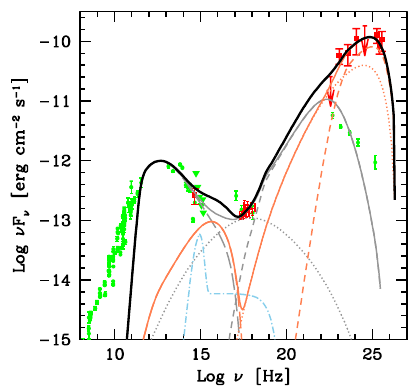
Caption: Broadband SED of QSO B0218+357 modeled with a two-zone model. The reconstructed fluxes (red squares) are corrected for different magnifications in different energy ranges (see the text). Historical measurements (ASDC7) are shown with green circles and triangles (flux upper limit). Gray curves depict the emission from the region located within the BLR, while orange curves refer to the region located beyond the BLR. Long dashed curves show the synchrotron radiation, dotted the SSC emission and short dashed the external Compton emission. Dashed-dotted light blue line represents the accretion disk emission and its X-ray corona. The solid black line shows the sum of the non-thermal emission from both regions.

Table of parameters:

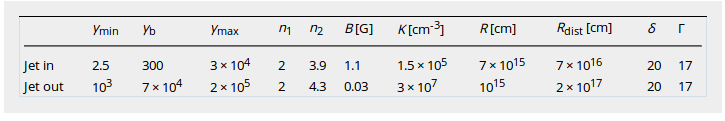

In [2]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import Distance
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
# import agnpy classes
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.compton import ExternalCompton, SynchrotronSelfCompton
from agnpy.targets import SSDisk, SphericalShellBLR, RingDustTorus

In [3]:
# matplotlib adjustments and axes labels
plt.rc("figure", figsize=(7.5, 5.5))
plt.rc("font", size=12)
plt.rc("axes", grid=True)
plt.rc("grid", ls=":")
sed_x_label = r"$\nu\,/\,Hz$"
sed_y_label = r"$\nu F_{\nu}\,/\,(\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1})$"

In [11]:
# S3 0218 detection paper settings
# blob in
spectrum_norm = 1.5e5 * u.Unit("cm-3")
parameters_in = {
    "k_1": spectrum_norm,
    "p1": 2.0,
    "p2": 3.9,
    "gamma_b": 300.,
    "gamma_min": 2.5,
    "gamma_max": 3.e4,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters_in}
R_b = 7e15 * u.cm
B = 1.1 * u.G
z = 0.94
delta_D = 20
Gamma = 17
# here I'm using changed code for the normalization such that k_1 above is the normalization at gamma=1
blob_in = Blob(R_b, z, delta_D, Gamma, B, 0, spectrum_dict)
blob_in.set_gamma_size(500)
print(f"total number {blob_in.N_e_tot:.2e}")
print(f"total energy {blob_in.W_e:.2e}")

dist_in=7e16 * u.cm # location of the emission region

#blob out
spectrum_norm = 3e7 * u.Unit("cm-3")
parameters_out = {
    "k_1": spectrum_norm,
    "p1": 2.0,
    "p2": 4.3,
    "gamma_b": 7.e4,
    "gamma_min": 1.e3,
    "gamma_max": 2.e5,
}

spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters_out}
R_b = 1e15 * u.cm
B = 0.03 * u.G
blob_out = Blob(R_b, z, delta_D, Gamma, B, 0, spectrum_dict)
blob_out.set_gamma_size(500)
print(f"total number {blob_out.N_e_tot:.2e}")
print(f"total energy {blob_out.W_e:.2e}")

dist_out=2e17 * u.cm # location of the emission region

normalising broken power-law to value at gamma=1: 1.50e+05 1 / cm3: at gama_b=300.0:  1.67e+00 1 / cm3
total number 8.57e+52
total energy 9.38e+47 erg
normalising broken power-law to value at gamma=1: 3.00e+07 1 / cm3: at gama_b=70000.0:  6.12e-03 1 / cm3
total number 1.24e+50
total energy 4.78e+47 erg


In [12]:
print(blob_in)
print(blob_out)

* spherical emission region
 - R_b (radius of the blob): 7.00e+15 cm
 - V_b (volume of the blob): 1.44e+48 cm3
 - z (source redshift): 0.94
 - d_L (source luminosity distance):1.94e+28 cm
 - delta_D (blob Doppler factor): 2.00e+01
 - Gamma (blob Lorentz factor): 1.70e+01
 - Beta (blob relativistic velocity): 9.98e-01
 - theta_s (jet viewing angle): 2.82e+00 deg
 - B (magnetic field tangled to the jet): 1.10e+00 G
* electron spectrum
 - broken power law
 - k_e: 1.67e+00 1 / cm3
 - p1: 2.00
 - p2: 3.90
 - gamma_b: 3.00e+02
 - gamma_min: 2.50e+00
 - gamma_max: 3.00e+04

* spherical emission region
 - R_b (radius of the blob): 1.00e+15 cm
 - V_b (volume of the blob): 4.19e+45 cm3
 - z (source redshift): 0.94
 - d_L (source luminosity distance):1.94e+28 cm
 - delta_D (blob Doppler factor): 2.00e+01
 - Gamma (blob Lorentz factor): 1.70e+01
 - Beta (blob relativistic velocity): 9.98e-01
 - theta_s (jet viewing angle): 2.82e+00 deg
 - B (magnetic field tangled to the jet): 3.00e-02 G
* electro

In [13]:
# synchrotron
synch_in = Synchrotron(blob_in, ssa=True)
synch_out = Synchrotron(blob_out, ssa=True)
# let us define now a grid of frequencies over which to calculate the synchrotron SED
nu_syn = np.logspace(8, 23) * u.Hz
# let us compute synchrotron SED
synch_sed_in = synch_in.sed_flux(nu_syn) 
synch_sed_out = synch_out.sed_flux(nu_syn) 

/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


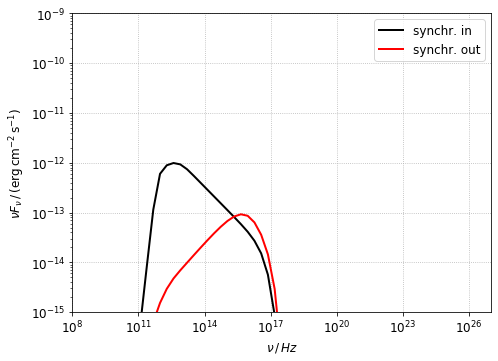

In [14]:
# synchrotron part seem to be reproduced very nicely
plt.loglog(nu_syn, synch_sed_in, color="k", lw=2, label="synchr. in")
plt.loglog(nu_syn, synch_sed_out, color="r", lw=2, label="synchr. out")
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.ylim(1e-15, 1e-9)
plt.xlim(1e8, 1e27)
plt.legend()
plt.show()

In [16]:
### EC starts here, first the disk, luminosity of 6 x 10^44 is taken from the paper, 
# rest of the paramters is not important here
M_sun = const.M_sun.cgs
M_BH = 1.2 * 1e9 * M_sun
R_g = ((const.G * M_BH) / (const.c * const.c)).cgs
L_disk = 6 * 1e44 * u.Unit("erg s-1")
eta = 1 / 12
R_in = 6 * R_g
R_out = 200 * R_g
disk = SSDisk(M_BH, L_disk, eta, R_in, R_out)
#print(disk)

In [17]:
epsilon_line = 2e-5 #Ly alpha, not sure what Fabrizio used in his code, but it should not matter much
print(epsilon_line*511.e3*u.Unit("eV"))
xi_line = 0.1  # it is not explicitely mentioned in the paper, but Fabrizio normally uses 10% for BLR
R_line = 7.7e16 * u.cm # value from the paper 
blr = SphericalShellBLR(disk, xi_line, epsilon_line, R_line)

10.22 eV


In [18]:
# define the array of frequencies over which to calculate the SED 
nu = np.logspace(15, 30) * u.Hz
ec_blr_in = ExternalCompton(blob_in, blr, r=dist_in)
ec_blr_in_sed = ec_blr_in.sed_flux(nu)
ec_blr_out = ExternalCompton(blob_out, blr, r=dist_out)
ec_blr_out_sed = ec_blr_out.sed_flux(nu)

In [19]:
# here define the DT
T_dt = 1e3 * u.K
epsilon_dt = 2.7 * ((const.k_B * T_dt) / (const.m_e * const.c * const.c)).decompose()
xi_dt = 0.6
# as for the BLR, the dust torus definition needs the accretion disk object as first argument
dt = RingDustTorus(disk, xi_dt, epsilon_dt, R_dt=2.e18*u.cm)

In [20]:
ec_dt_in = ExternalCompton(blob_in, dt, dist_in)
ec_dt_out = ExternalCompton(blob_out, dt, dist_out)
# compute the SEDs
ec_dt_in_sed = ec_dt_in.sed_flux(nu)
ec_dt_out_sed = ec_dt_out.sed_flux(nu)

In [21]:
### SSC
# simple ssc
ssc_in = SynchrotronSelfCompton(blob_in, synch_in)
ssc_out = SynchrotronSelfCompton(blob_out, synch_out)
ssc_in_sed = ssc_in.sed_flux(nu)
ssc_out_sed = ssc_out.sed_flux(nu)

/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
../agnpy/compton.py:24: RuntimeWarning: invalid value encountered in log
  term_1 = 2 * q * np.log(q)


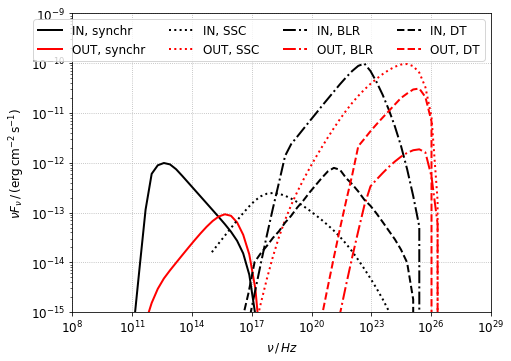

In [22]:
plt.loglog(nu_syn, synch_sed_in, color="k", lw=2, label="IN, synchr")
plt.loglog(nu_syn, synch_sed_out, color="r", lw=2, label="OUT, synchr")

plt.loglog(nu, ssc_in_sed, lw=2, ls=':', color="k", label="IN, SSC")
plt.loglog(nu, ssc_out_sed, lw=2, ls=':', color="r", label="OUT, SSC")

plt.loglog(nu, ec_blr_in_sed, lw=2, ls='-.', color="k", label="IN, BLR")
plt.loglog(nu, ec_blr_out_sed, lw=2, ls='-.', color="r", label="OUT, BLR")

plt.loglog(nu, ec_dt_in_sed,  lw=2, ls='--', color="k", label="IN, DT")
plt.loglog(nu, ec_dt_out_sed, lw=2, ls='--', color="r", label="OUT, DT")

plt.ylim(1e-15, 1e-9)
plt.xlim(1e8, 1e29)
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend(ncol=4)
plt.show()

as written above synchrotron radiation seems fine for both blobs, so I probably did not screw up anything with the parameters

SSC component on the other hand is ~2.5 times higher then in Fabrizio's modelling

with EC it is more difficult to compare, because he stacks up both radiation fields: BLR and DT, plus the radiation field simplifications are somewhat different in both codes.
For IN region BLR is dominant, but the code gives ~factor 10 larger flux compared to Fabrizio's one
For OUT region DT is dominant and the code gives a factor 3 below the Fabrizio's one

### pks 1510 low state
now try with another paper, low state of PKS1510, modelling of "close" emission region
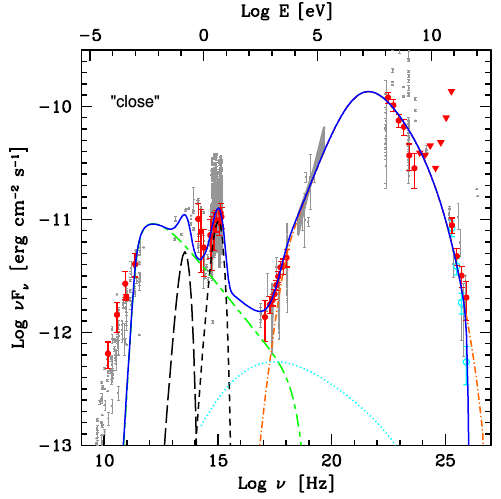
green - synchr, cyan - SSC, red - EC
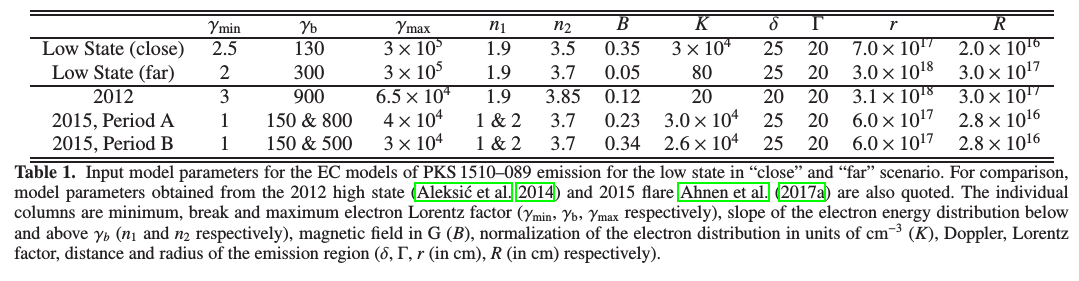

In [25]:
spectrum_norm = 3.e4 * u.Unit("cm-3")
parameters = {
    "k_1": spectrum_norm,
    "p1": 1.9,
    "p2": 3.5,
    "gamma_b": 130.,
    "gamma_min": 2.5,
    "gamma_max": 3.e5,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters}
R_b = 2e16 * u.cm
B = 0.35 * u.G
z = 0.36
delta_D = 25
Gamma = 20
# here I'm using changed code for the normalization such that k_1 above is the normalization at gamma=1
blob = Blob(R_b, z, delta_D, Gamma, B, 0, spectrum_dict)
blob.set_gamma_size(500)
print(f"total number {blob.N_e_tot:.2e}")
print(f"total energy {blob.W_e:.2e}")

dist=7e17 * u.cm # location of the emission region

normalising broken power-law to value at gamma=1: 3.00e+04 1 / cm3: at gama_b=130.0:  2.89e+00 1 / cm3
total number 4.81e+53
total energy 5.26e+48 erg


/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


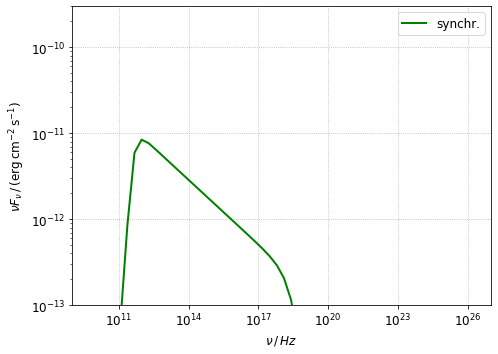

In [24]:
# synchrotron
synch = Synchrotron(blob, ssa=True)
synch_sed = synch.sed_flux(nu_syn) 
plt.loglog(nu_syn, synch_sed, color="g", lw=2, label="synchr.")
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.ylim(1e-13, 3e-10)
plt.xlim(1e9, 1e27)
plt.legend()
plt.show()

In [27]:
# Disk, BLR and DT parameters from the paper
L_disk1510 = 6.7 * 1e45 * u.Unit("erg s-1")
disk1510 = SSDisk(M_BH, L_disk1510, eta, R_in, R_out)
R_line1510 = 2.6e17 * u.cm # value from the paper 
blr1510 = SphericalShellBLR(disk1510, xi_line, epsilon_line, R_line1510)
dt1510 = RingDustTorus(disk1510, xi_dt, epsilon_dt, R_dt=6.5e18*u.cm)
print(blr1510)
print(dt1510)

* Spherical Shell Broad Line Region:
 - M_BH (central black hole mass): 2.39e+42 g
 - L_disk (accretion disk luminosity): 6.70e+45 erg / s
 - xi_line (fraction of the disk radiation reprocessed by the BLR): 1.00e-01
 - epsilon_line (dimensionless energy of the emitted line): 2.00e-05
 - R_line (radius of the BLR shell): 2.60e+17 cm

* SRing Dust Torus:
 - M_BH (central black hole mass): 2.39e+42 g
 - L_disk (accretion disk luminosity): 6.70e+45 erg / s
 - xi_dt (fraction of the disk radiation reprocessed by the torus): 6.00e-01
 - epsilon_dt (dimensionless temperature of the dust torus): 4.55e-07
 - R_dt (radius of the torus): 6.50e+18 cm



In [35]:
# now calculate SSC and EC
ssc_1510 = SynchrotronSelfCompton(blob, synch)
ssc_1510_sed = ssc_1510.sed_flux(nu)
ec_blr_1510 = ExternalCompton(blob, blr1510, r=dist)
ec_blr_1510_sed = ec_blr_1510.sed_flux(nu)
ec_dt_1510 = ExternalCompton(blob, dt1510, dist)
ec_dt_1510_sed = ec_dt_1510.sed_flux(nu)

/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
../agnpy/compton.py:24: RuntimeWarning: invalid value encountered in log
  term_1 = 2 * q * np.log(q)


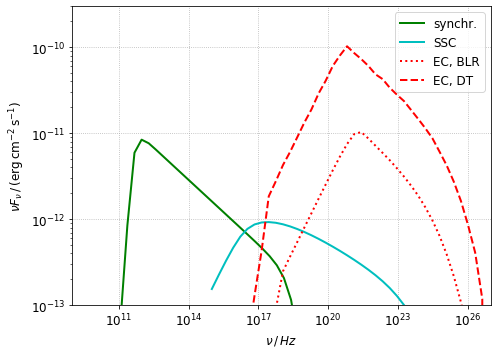

In [36]:
# and plot everything
plt.loglog(nu_syn, synch_sed, color="g", lw=2, label="synchr.")
plt.loglog(nu, ssc_1510_sed, color="c", lw=2, label="SSC")
plt.loglog(nu, ec_blr_1510_sed, color="r", ls=':', lw=2, label="EC, BLR")
plt.loglog(nu, ec_dt_1510_sed, color="r", ls='--', lw=2, label="EC, DT")
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.ylim(1e-13, 3e-10)
plt.xlim(1e9, 1e27)
plt.legend()
plt.show()

SSC is 60% higher then in Fabrizio's code

EC is a factor of ~2 below Fabrizio's code


### backups

In [46]:
# PKS1510-089 2015 flare paper settings
# blob A
spectrum_norm = 4e4 * u.Unit("cm-3")
parameters_in = {
    "p1": 1.9,
    "p2": 3.7,
    "gamma_b": 800.,
    "gamma_min": 200.,
    "gamma_max": 5.e4,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters_in}
R_b = 2e16 * u.cm
B = 0.23 * u.G
z = 0.36
delta_D = 25
Gamma = 20
blob_in = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
blob_in.set_gamma_size(500)
print(f"total number {blob_in.N_e_tot:.2e}")
print(f"total energy {blob_in.W_e:.2e}")

#blob B
spectrum_norm = 3e7 * u.Unit("cm-3")
parameters_out = {
    "p1": 2.1,
    "p2": 3.7,
    "gamma_b": 500.,
    "gamma_min": 200.,
    "gamma_max": 4.1e4,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters_out}
B = 0.33 * u.G
blob_out = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
blob_out.set_gamma_size(500)
print(f"total number {blob_out.N_e_tot:.2e}")
print(f"total energy {blob_out.W_e:.2e}")

normalising broken power-law to total particle density: 4.00e+04 1 / cm3
total number 1.34e+54
total energy 5.28e+50 erg
normalising broken power-law to total particle density: 3.00e+07 1 / cm3
total number 1.01e+57
total energy 3.26e+53 erg


150000.0 1 / cm3


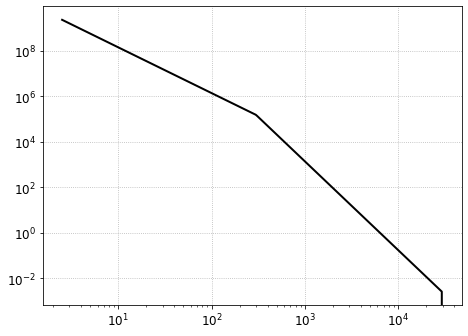

In [7]:
plt.loglog(blob_in.gamma, blob_in.n_e(blob_in.gamma), color="k", lw=2, label="EED")
print(blob_in.n_e.k_e)
